In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import lasio
data = lasio.read("sample.las")
data.header

Header section Parameter regexp=~P was not found.


{'Curves': [CurveItem(mnemonic=DEPTH, unit=FT, value=, descr=Depth, original_mnemonic=DEPTH, data.shape=(24321,)),
  CurveItem(mnemonic=CALI, unit=IN, value=, descr=Caliper         Caliper, original_mnemonic=CALI, data.shape=(24321,)),
  CurveItem(mnemonic=DENC, unit=G/CC, value=, descr=Drho            Density Correction, original_mnemonic=DENC, data.shape=(24321,)),
  CurveItem(mnemonic=DENS, unit=G/CC, value=, descr=Density         Bulk Density, original_mnemonic=DENS, data.shape=(24321,)),
  CurveItem(mnemonic=DTC, unit=US/F, value=, descr=Sonic           Compressional Sonic, original_mnemonic=DTC, data.shape=(24321,)),
  CurveItem(mnemonic=GR, unit=GAPI, value=, descr=GammaRay        Gamma Ray, original_mnemonic=GR, data.shape=(24321,)),
  CurveItem(mnemonic=LLD, unit=OHMM, value=, descr=DeepRes         Deep Laterolog Resistivity, original_mnemonic=LLD, data.shape=(24321,)),
  CurveItem(mnemonic=LLS, unit=OHMM, value=, descr=ShalRes         Shallow Laterolog Resistivity, original_m

In [131]:
type(data.data)

numpy.ndarray

In [132]:
data.data.shape

(24321, 12)

In [133]:
for curve in data.curves:
    print(curve.mnemonic)
    print(curve.unit)
    print(curve.data)
    print("\n\n")

DEPTH
FT
[0.00000e+00 5.00000e-01 1.00000e+00 ... 1.21590e+04 1.21595e+04
 1.21600e+04]



CALI
IN
[nan nan nan ... nan nan nan]



DENC
G/CC
[nan nan nan ... nan nan nan]



DENS
G/CC
[nan nan nan ... nan nan nan]



DTC
US/F
[nan nan nan ... nan nan nan]



GR
GAPI
[nan nan nan ... nan nan nan]



LLD
OHMM
[nan nan nan ... nan nan nan]



LLS
OHMM
[nan nan nan ... nan nan nan]



NEUT
FRAC
[nan nan nan ... nan nan nan]



RDEP
OHMM
[nan nan nan ... nan nan nan]



RSHAL
OHMM
[nan nan nan ... nan nan nan]



SP
MV
[nan nan nan ... nan nan nan]





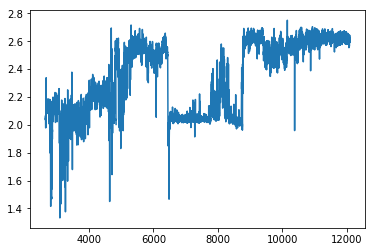

In [134]:
import matplotlib.pyplot as plt
plt.plot(data.index, data["DENS"])

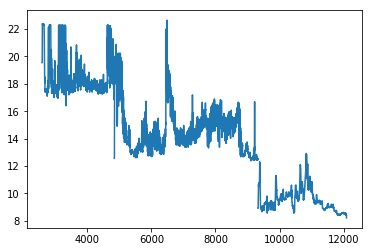

In [135]:
plt.plot(data.index, data["CALI"])

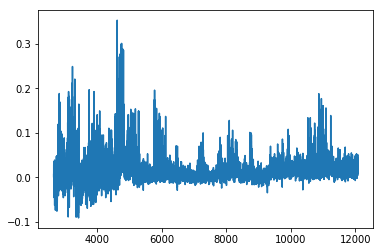

In [136]:
plt.plot(data.index, data["DENC"])

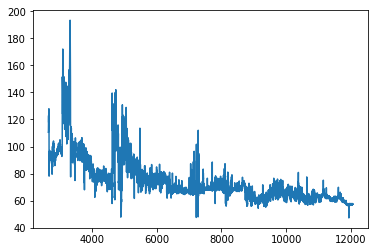

In [137]:
plt.plot(data.index, data["DTC"])

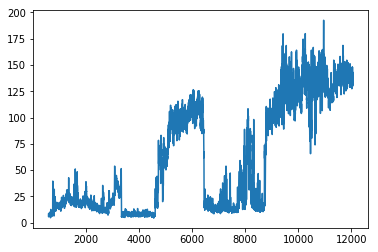

In [138]:
plt.plot(data.index, data["GR"])

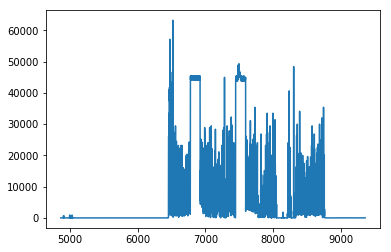

In [139]:
plt.plot(data.index, data["LLD"])

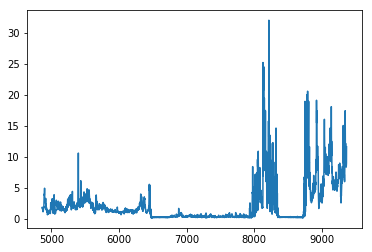

In [140]:
plt.plot(data.index, data["LLS"])

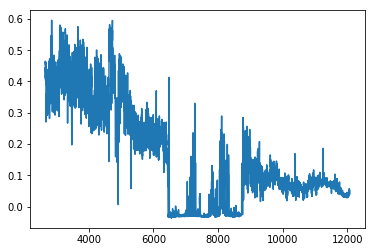

In [141]:
plt.plot(data.index, data["NEUT"])

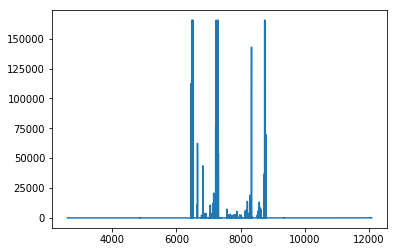

In [142]:
plt.plot(data.index, data["RDEP"])

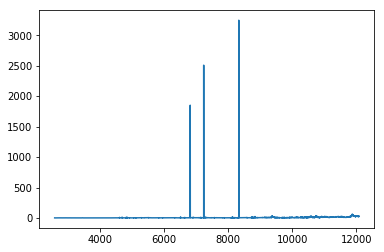

In [143]:
plt.plot(data.index, data["RSHAL"])

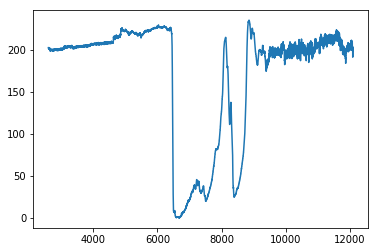

In [144]:
plt.plot(data.index, data["SP"])

In [162]:
df = data.df()

In [165]:
df.head()
df = df.dropna()
df.fillna(-9999999999)
df.isnull().any()





CALI     False
DENC     False
DENS     False
DTC      False
GR       False
LLD      False
LLS      False
NEUT     False
RDEP     False
RSHAL    False
SP       False
dtype: bool

In [166]:
df_train = df[:7000]    # 60% training data and 40% testing data
df_test = df[7000:]
scaler = MinMaxScaler() # For normalizing dataset

In [167]:
X_train = scaler.fit_transform(df_train.drop(['NEUT'],axis=1).as_matrix())
y_train = scaler.fit_transform(df_train['NEUT'].as_matrix().reshape(-1, 1))


In [168]:
X_test = scaler.fit_transform(df_test.drop(['NEUT'],axis=1).as_matrix())
y_test = scaler.fit_transform(df_test['NEUT'].as_matrix().reshape(-1,1))


In [169]:
def denormalize(df,norm_data):
    df = df['NEUT'].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)

In [173]:
def neural_net_model(X_data,input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)


    # layer 1 multiplying and adding bias then activation function

    W_2 = tf.Variable(tf.random_uniform([10,10]))
    b_2 = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)

    # layer 2 multiplying and adding bias then activation function

    W_O = tf.Variable(tf.random_uniform([10,1]))
    b_O = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2,W_O), b_O)

    # O/p layer multiplying and adding bias then activation function

    # notice output layer has one node only since performing #regression

    return output

"""
neural_net_model is function applying 2 hidden layer feed forward neural net.

Weights and biases are abberviated as W_1,W_2 and b_1, b_2 
These are variables with will be updated during training.

"""

xs = tf.placeholder("float")
ys = tf.placeholder("float")

output = neural_net_model(xs,10)

cost = tf.reduce_mean(tf.square(output-ys))

# our mean squared error cost function

train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

# Gradinent Descent optimiztion just discussed above for updating weights and biases

In [175]:
c_t = []
c_test = []

with tf.Session() as sess:

    # Initiate session and initialize all vaiables
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    #saver.restore(sess,'yahoo_dataset.ckpt')
    for i in range(100):
        for j in range(X_train.shape[0]):
            sess.run([cost,train],feed_dict=    {xs:X_train[j,:].reshape(1,10), ys:y_train[j]})
            # Run cost and train with each sample

        c_t.append(sess.run(cost, feed_dict={xs:X_train,ys:y_train}))
        c_test.append(sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
        print('Epoch :',i,'Cost :',c_t[i])

    pred = sess.run(output, feed_dict={xs:X_test})
    # predict output of test data after training

    print('Cost :',sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
    y_test = denormalize(df_test,y_test)
    pred = denormalize(df_test,pred)
        #Denormalize data     

    plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
    plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
    plt.legend(loc='best')
    plt.ylabel('POROSITY VALUE')
    plt.xlabel('DEPTH')
    plt.title('POROSITY PREDICTION USING NN')
    plt.show()
    if input('Save model ? [Y/N]') == 'Y':
        saver.save(sess,'yahoo_dataset.ckpt')
        print('Model Saved')

Epoch : 0 Cost : 0.24834217
Epoch : 1 Cost : 0.21866407
Epoch : 2 Cost : 0.20268732
Epoch : 3 Cost : 0.19210526
Epoch : 4 Cost : 0.18407397
Epoch : 5 Cost : 0.17749907
Epoch : 6 Cost : 0.17192297
Epoch : 7 Cost : 0.16712208
Epoch : 8 Cost : 0.16291615
Epoch : 9 Cost : 0.15922375
Epoch : 10 Cost : 0.1559626
Epoch : 11 Cost : 0.15308063
Epoch : 12 Cost : 0.15051553
Epoch : 13 Cost : 0.14821379
Epoch : 14 Cost : 0.14616843
Epoch : 15 Cost : 0.1443272
Epoch : 16 Cost : 0.14266744
Epoch : 17 Cost : 0.14117043
Epoch : 18 Cost : 0.1398172
Epoch : 19 Cost : 0.13859192
Epoch : 20 Cost : 0.13748229
Epoch : 21 Cost : 0.13647287
Epoch : 22 Cost : 0.13555291
Epoch : 23 Cost : 0.13471308
Epoch : 24 Cost : 0.13394539
Epoch : 25 Cost : 0.13323233
Epoch : 26 Cost : 0.13257104
Epoch : 27 Cost : 0.13195474
Epoch : 28 Cost : 0.1313874
Epoch : 29 Cost : 0.13085416
Epoch : 30 Cost : 0.13035035
Epoch : 31 Cost : 0.12987326
Epoch : 32 Cost : 0.12942097
Epoch : 33 Cost : 0.12899306
Epoch : 34 Cost : 0.1285773


AttributeError: 'NoneType' object has no attribute 'shape'